Here we are working on advertising dataset. To analyse the relationship between 'tv advertising' and 'sales'


**Get the data**

In [3]:
# import the libraries
import pandas as pd
import numpy as np 

# for visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

# get the data from file
advertising=pd.read_csv('/content/sample_data/advertising.csv')

**Understand the data**

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9




*   TV,Radio, Newspaper are input labeled column
*   We need to predict Sales column, it is continuous value



In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.shape

(200, 4)



*   There are 4 columns in the dataset
*   200 rows
*   There are all in correct data type




**Data Cleaning**

In [7]:
# check if there are null values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# any duplicates
advertising[advertising.duplicated()]

,TV,Radio,Newspaper,Sales


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


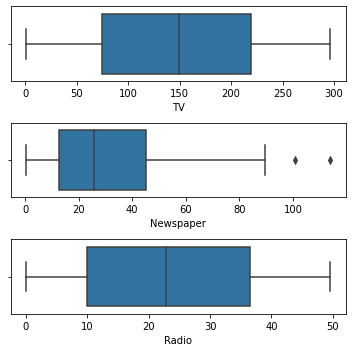

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()



1.   There are no null values
2.   There are no missing values
3.   There are no considerable outliers
4.   The data is in structured format
5.   The columns are in correct in correct data type


**Exploratory Data Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


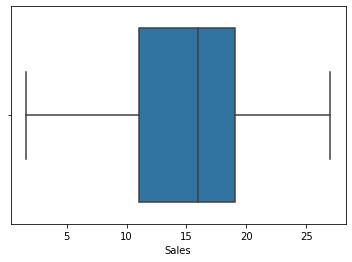

In [10]:
# target variable 'sales'
sns.boxplot(advertising['Sales'])
plt.show()

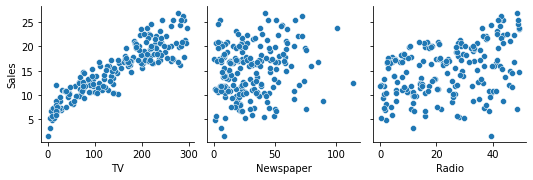

In [11]:
# let us see how sales are related to other variables using scatter plot
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'],kind='scatter')
plt.show()

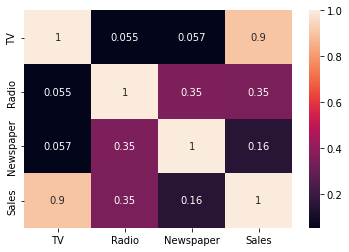

In [13]:
# let us see the correlation between variables using heatmap
sns.heatmap(advertising.corr(),annot=True)
plt.show()

From the pairplot and heatmap, we can see TV is most correlated with sales

**Model Building**

### Simple Linear Regression
*   here TV is input variable
*    sales is the target variable
*    equation y=m*TV+c

In [60]:
# assigning feature variable, target variable
X=advertising.drop(["Sales","Newspaper","Radio"],axis=1)
y=advertising['Sales']

In [61]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [62]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

**Train Test Split**

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,)

In [64]:
X_train.head()

,TV
109,255.4
101,296.4
5,8.7
160,172.5
61,261.3


**Model Selection**

In [65]:
from sklearn.linear_model import LinearRegression

In [41]:
X_train=X_train.values.reshape(1,-1)

In [43]:
y_train=y_train.values.reshape(1,-1)

In [44]:
X_train.shape

(1, 140)

In [45]:
y_train.shape

(1, 140)

In [66]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.intercept_

6.848162736801497

In [68]:
lr.coef_

array([0.05658641])

Equation : y= 6.8481+0.05*TV

In [70]:
lr.score(X,y)

0.8117908386955002

R square value is 81.17%, means that 81% of variance in Sales is explained by 'TV'. It is a significant model 

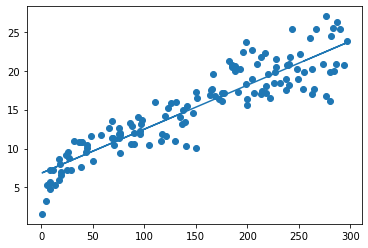

In [71]:
# visualising the fit on train data set
plt.scatter(X_train,y_train)
plt.plot(X_train,6.841+0.0565*X_train)
plt.show()

**Model Evaluation**

In [72]:
model_predict=lr.predict(X_test)

In [73]:
from sklearn import metrics 
r2_score=metrics.r2_score(y_test,model_predict)

In [74]:
print(r2_score)

0.7485025710181729


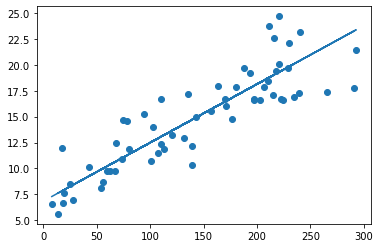

In [75]:
# visualizing the fit on test data set
plt.scatter(X_test,y_test)
plt.plot(X_test,6.841+0.0565*X_test)
plt.show()